<a href="https://colab.research.google.com/github/LarcesUece/RNP-Projects/blob/main/Teste-inicial-TP12210822.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### API

In [ ]:
import requests
import json
url_teste2 ="http://monipe-central.rnp.br/esmond/perfsonar/archive/?pscheduler-test-type=throughput&source=monipe-ce-banda.rnp.br&destination=monipe-sp-banda.rnp.br&bw-target-bandwidth=10000000000&time-range=15552000"
resp_teste2 = requests.get(url_teste2)
resp_json_teste2 = resp_teste2.json()

# 
url = "http://monipe-central.rnp.br/esmond/perfsonar/archive/1fcea1e943be43a59f460529e43c9c76/throughput/base?time-range=15552000"
throughput = requests.get(url)
throughput_json = throughput.json()
#print(throughput.status_code)

with open("throughput1.csv", "w", encoding="utf-8") as f:
    f.write("timestamp,value,interval\n")
    last = 0
    for dic in throughput_json:
        items = list(dic.values())
        last = items[0]-last
        f.write(f"{items[0]},{items[1]},{last}\n")
        last = items[0]

# 
url = "http://monipe-central.rnp.br/esmond/perfsonar/archive/acc629df77a24cf499f1f7715a2d8b14/throughput/base?time-range=15552000"
throughput = requests.get(url)
throughput_json = throughput.json()
#print(throughput.status_code)

with open("throughput2.csv", "w", encoding="utf-8") as f:
    f.write("timestamp,value,interval\n")
    last = 0
    for dic in throughput_json:
        items = list(dic.values())
        last = items[0]-last
        f.write(f"{items[0]},{items[1]},{last}\n")
        last = items[0]

#Teste usando summary window
url = "http://monipe-central.rnp.br/esmond/perfsonar/archive/1fcea1e943be43a59f460529e43c9c76/throughput/averages/86400"
headers = {"summary-window": "15552000"}
throughput = requests.get(url, headers)
throughput_json = throughput.json()
#print(throughput.status_code)
#print(len(throughput_json))
with open("throughput_summary1.csv", "w", encoding="utf-8") as f:
    f.write("timestamp,value,interval\n")
    last = 0
    for dic in throughput_json:
        items = list(dic.values())
        last = items[0]-last
        f.write(f"{items[0]},{items[1]},{last}\n")
        last = items[0]

#Teste usando summary window
url = "http://monipe-central.rnp.br/esmond/perfsonar/archive/acc629df77a24cf499f1f7715a2d8b14/throughput/averages/86400"
throughput = requests.get(url)
throughput_json = throughput.json()
print(throughput.status_code)
print(len(throughput_json))
with open("throughput_summary2.csv", "w", encoding="utf-8") as f:
    f.write("timestamp,value,interval\n")
    last = 0
    for dic in throughput_json:
        items = list(dic.values())
        last = items[0]-last
        f.write(f"{items[0]},{items[1]},{last}\n")
        last = items[0]

200
168


### LIB (R)

In [1]:
# bibliotecas do python
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# bibliotecas do R
base = importr('base')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
ts_analysis = ('urca','tseries','forecast','e1071','Metrics')

from rpy2.robjects.vectors import StrVector
utils.install_packages(StrVector(ts_analysis))

(as ‘lib’ is unspecified)




















































































	‘/tmp/Rtmpbjw7Fe/downloaded_packages’



<rpy2.rinterface_lib.sexp.NULLType object at 0x7fa157d79e60> [RTYPES.NILSXP]

In [3]:
# importando as bibliotecas do R usadas para predição
# acho que so precisa importar uma vez. (demora)

urca = importr('urca')
tseries = importr('tseries')
forecast = importr('forecast')
e1071 = importr('e1071')
metrics = importr('Metrics')

In [4]:
# %R - "linha mágica" - retorna valor como objeto python

# %%R - "célula mágica" - nao retorna valor mas consegue passar input e output  

# Arguments
# -i  -  variaveis de input
# -o  -  variaveis de output
# -h  -  altura do plot
# -w  -  largura do plot


%load_ext rpy2.ipython

### Throughput Total (PRA - Remoção de Erros de Ciclo)

In [6]:
TP = pd.read_csv(r'/content/Throughput12210822.csv')

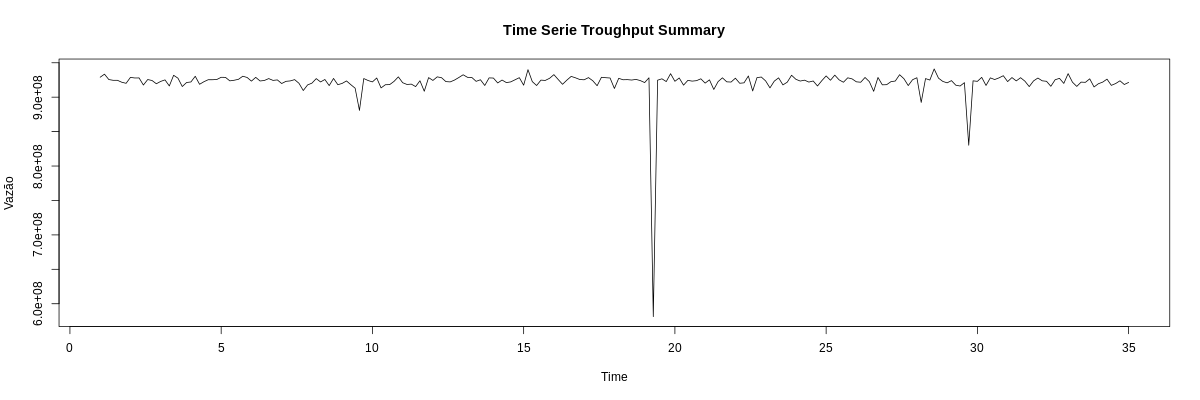

In [21]:
%%R -i TP -h 400 -w 1200

TP_R = TP

TPTS = ts(TP_R[,2], start = c(1, 1), frequency = 7)

plot(TPTS, main = "Time Serie Troughput Summary", ylab = "Vazão")

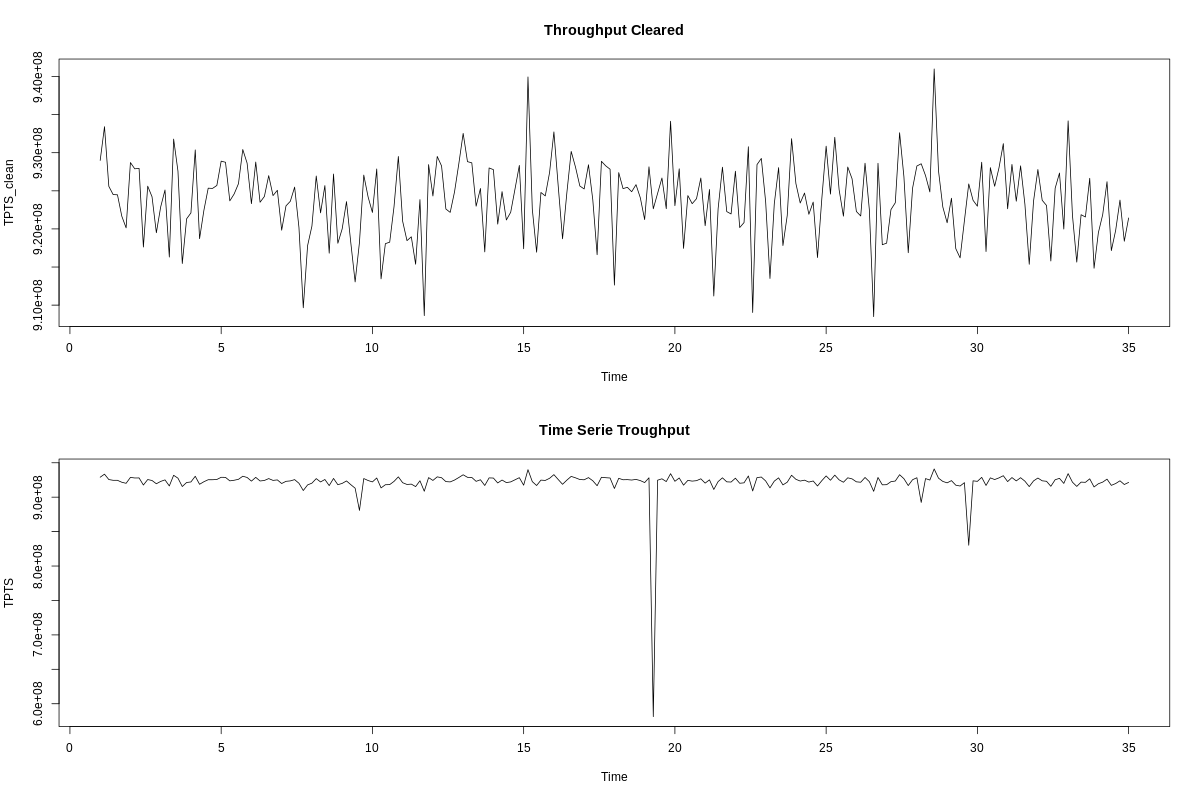

In [22]:
%%R -h 800 -w 1200

# Ajuste inicial da série

TPTS_clean = tsclean(TPTS)

par(mfrow = c(2,1))
plot(TPTS_clean, main = "Throughput Cleared")
plot(TPTS, main = "Time Serie Troughput")    

### Teste de Estacionariedade (Serie Total - Teste Geral)


####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.0799 


####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.0956 


####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.014 



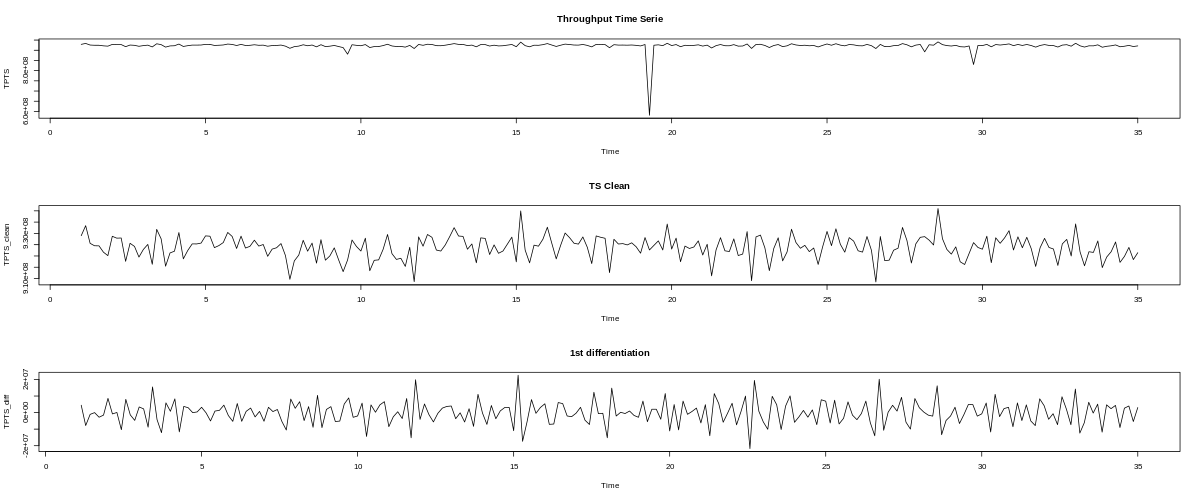

In [25]:
%%R -h 500 -w 1200 # uma diferenciação

TPTS_diff <- diff(TPTS_clean)

par(mfrow = c(3,1))
plot(TPTS, main = "Throughput Time Serie")
plot(TPTS_clean, main = "TS Clean")
plot(TPTS_diff, main = "1st differentiation")

print(ur.kpss(TPTS))
print(ur.kpss(TPTS_clean))
print(ur.kpss(TPTS_diff))

### Separar Conjuntos

In [26]:
%%R -w 1200 -h 600 # Separar conjuntos de treino e teste (5 pra 1)

conjunto_treino = c("mytsTrain5",
                    "mytsTrain10",
                    "mytsTrain15",
                    "mytsTrain20",
                    "mytsTrain25",
                    "mytsTrain30",
                    "mytsTrain35")

mytsTrain5 = window(TPTS_clean, start = c(1,1), end = c(5,7))
mytsTrain10 = window(TPTS_clean, start = c(1,1), end = c(10,7))
mytsTrain15 = window(TPTS_clean, start = c(1,1), end = c(15,7))
mytsTrain20 = window(TPTS_clean, start = c(1,1), end = c(20,7))
mytsTrain25 = window(TPTS_clean, start = c(1,1), end = c(25,7))
mytsTrain30 = window(TPTS_clean, start = c(1,1), end = c(30,7))
mytsTrain35 = window(TPTS_clean, start = c(1,1), end = c(33,7))

mytsTest1 = window(TPTS_clean, start = c(6,1), end = c(6,7))
mytsTest2 = window(TPTS_clean, start = c(11,1), end = c(11,7))
mytsTest3 = window(TPTS_clean, start = c(16,1), end = c(16,7))
mytsTest4 = window(TPTS_clean, start = c(21,1), end = c(21,7))
mytsTest5 = window(TPTS_clean, start = c(26,1), end = c(26,7))
mytsTest6 = window(TPTS_clean, start = c(31,1), end = c(31,7))
mytsTest7 = window(TPTS_clean, start = c(34,1), end = c(34,7))

#par(mfrow = c(3,1))
#plot(mytsTest1)
#plot(mytsTest4)
#plot(mytsTest7)

### Teste de Estacionariedade (PRA)

In [27]:
%%R -w 1000 -h 700 # Testes de Estacionariedade (PRA)

adf_test = c(
  adf.test(mytsTrain5)$statistic,
  adf.test(mytsTrain10)$statistic,
  adf.test(mytsTrain15)$statistic,
  adf.test(mytsTrain20)$statistic,
  adf.test(mytsTrain25)$statistic,
  adf.test(mytsTrain30)$statistic,
  adf.test(mytsTrain35)$statistic)

adf_test_pvalue = c(
  adf.test(mytsTrain5)$p.value,
  adf.test(mytsTrain10)$p.value,
  adf.test(mytsTrain15)$p.value,
  adf.test(mytsTrain20)$p.value,
  adf.test(mytsTrain25)$p.value,
  adf.test(mytsTrain30)$p.value,
  adf.test(mytsTrain35)$p.value)

kpss_test = c(
  kpss.test(mytsTrain5)$statistic,
  kpss.test(mytsTrain10)$statistic,
  kpss.test(mytsTrain15)$statistic,
  kpss.test(mytsTrain20)$statistic,
  kpss.test(mytsTrain25)$statistic,
  kpss.test(mytsTrain30)$statistic,
  kpss.test(mytsTrain35)$statistic)

kpss_test_pvalue = c(
  kpss.test(mytsTrain5)$p.value,
  kpss.test(mytsTrain10)$p.value,
  kpss.test(mytsTrain15)$p.value,
  kpss.test(mytsTrain20)$p.value,
  kpss.test(mytsTrain25)$p.value,
  kpss.test(mytsTrain30)$p.value,
  kpss.test(mytsTrain35)$p.value)

testes_estac = data.frame(conjuntos_de_treino = conjunto_treino, 
                          ADF_Test = adf_test, ADF_Pvalue = adf_test_pvalue, 
                          KPSS_Test = kpss_test, KPSS_Pvalue = kpss_test_pvalue)
print(testes_estac)

  conjuntos_de_treino  ADF_Test ADF_Pvalue  KPSS_Test KPSS_Pvalue
1          mytsTrain5 -2.984574 0.19078846 0.19249445  0.10000000
2         mytsTrain10 -3.379597 0.06622967 0.56885256  0.02615933
3         mytsTrain15 -3.759350 0.02352695 0.21736954  0.10000000
4         mytsTrain20 -3.628432 0.03329399 0.25745238  0.10000000
5         mytsTrain25 -4.306215 0.01000000 0.15134025  0.10000000
6         mytsTrain30 -5.230121 0.01000000 0.11980770  0.10000000
7         mytsTrain35 -4.419737 0.01000000 0.08187414  0.10000000


### Aplicação dos modelos de predição

### Treinamento - (ARIMA, Rede Neural, Holt-Winters)

In [28]:
%%R # Treinamento ARIMA

mytsArima5 = auto.arima(mytsTrain5, d=1, lambda = 0)
mytsArima10 = auto.arima(mytsTrain10, d=1, lambda = 0)
mytsArima15 = auto.arima(mytsTrain15, d=1, lambda = 0)
mytsArima20 = auto.arima(mytsTrain20, d=1, lambda = 0)
mytsArima25 = auto.arima(mytsTrain25, d=1, lambda = 0)
mytsArima30 = auto.arima(mytsTrain30, d=1, lambda = 0)
mytsArima35 = auto.arima(mytsTrain35, d=1, lambda = 0)

In [29]:
%%R # Treinamento Neural

mytsNeural5 = nnetar(mytsTrain5, d=1, lambda = 0)
mytsNeural10 = nnetar(mytsTrain10, d=1, lambda = 0)
mytsNeural15 = nnetar(mytsTrain15, d=1, lambda = 0)
mytsNeural20 = nnetar(mytsTrain20, d=1, lambda = 0)
mytsNeural25 = nnetar(mytsTrain25, d=1, lambda = 0)
mytsNeural30 = nnetar(mytsTrain30, d=1, lambda = 0)
mytsNeural35 = nnetar(mytsTrain35, d=1, lambda = 0)


In [31]:
%%R # Treinamento Holt-Winters

mytsHoltETS5 = ets(mytsTrain5, model = 'ZAA', damped = T, lambda = 0)
mytsHoltETS10 = ets(mytsTrain10, model = 'ZAA', damped = T, lambda = 0)
mytsHoltETS15 = ets(mytsTrain15, model = 'ZAA', damped = T, lambda = 0)
mytsHoltETS20 = ets(mytsTrain20, model = 'ZAA', damped = T, lambda = 0)
mytsHoltETS25 = ets(mytsTrain25, model = 'ZAA', damped = T, lambda = 0)
mytsHoltETS30 = ets(mytsTrain30, model = 'ZAA', damped = T, lambda = 0)
mytsHoltETS35 = ets(mytsTrain35, model = 'ZAA', damped = T, lambda = 0)

### Previsões

In [32]:
%%R # Previsão ARIMA

prevArima5 = forecast(mytsArima5, h=7)
prevArima10 = forecast(mytsArima10, h=7)
prevArima15 = forecast(mytsArima15, h=7)
prevArima20 = forecast(mytsArima20, h=7)
prevArima25 = forecast(mytsArima25, h=7)
prevArima30 = forecast(mytsArima30, h=7)
prevArima35 = forecast(mytsArima35, h=7)

In [33]:
%%R # Previsão com Rede Neural

prevNeural5 = forecast(mytsNeural5, h=7)
prevNeural10 = forecast(mytsNeural10, h=7)
prevNeural15 = forecast(mytsNeural15, h=7)
prevNeural20 = forecast(mytsNeural20, h=7)
prevNeural25 = forecast(mytsNeural25, h=7)
prevNeural30 = forecast(mytsNeural30, h=7)
prevNeural35 = forecast(mytsNeural35, h=7)

In [34]:
%%R # Previsões Holt-Winters

prevHolt5 = forecast(mytsHoltETS5, h=7)
prevHolt10 = forecast(mytsHoltETS10, h=7)
prevHolt15 = forecast(mytsHoltETS15, h=7)
prevHolt20 = forecast(mytsHoltETS20, h=7)
prevHolt25 = forecast(mytsHoltETS25, h=7)
prevHolt30 = forecast(mytsHoltETS30, h=7)
prevHolt35 = forecast(mytsHoltETS35, h=7)

### Plots - Comparação de alguns ciclos

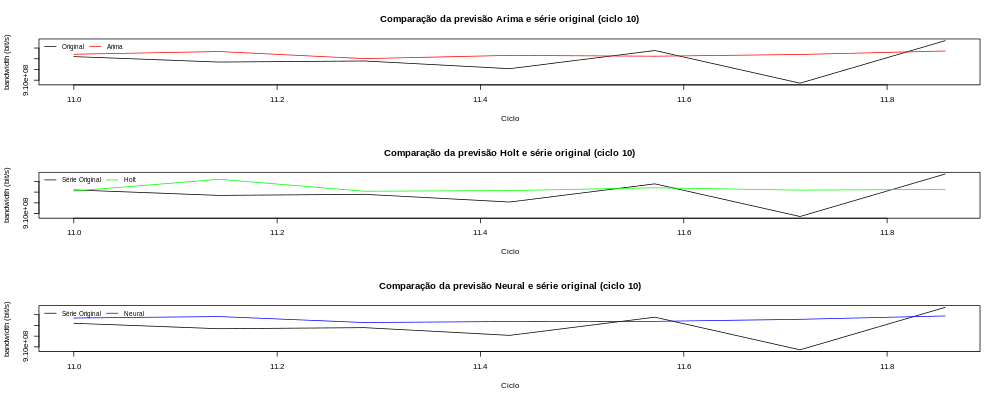

In [39]:
%%R -h 400 -w 1000 # ciclo 10

par(mfrow = c(3, 1))
plot(mytsTest2, main="Comparação da previsão Arima e série original (ciclo 10)", xlab="Ciclo", ylab="bandwidth (bit/s)")
lines(prevArima10$mean, col="red")
legend("topleft", legend = c("Original", "Arima"), col = c("black", "red"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest2, main="Comparação da previsão Holt e série original (ciclo 10)", xlab="Ciclo", ylab="bandwidth (bit/s)")
lines(prevHolt10$mean, col="green")
legend("topleft", legend = c("Série Original", "Holt"), col = c("black", "green"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest2, main="Comparação da previsão Neural e série original (ciclo 10)", xlab="Ciclo", ylab="bandwidth (bit/s)")
lines(prevNeural10$mean, col="blue")
legend("topleft", legend = c("Série Original", "Neural"), col = c("black", "blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

#dev.off()

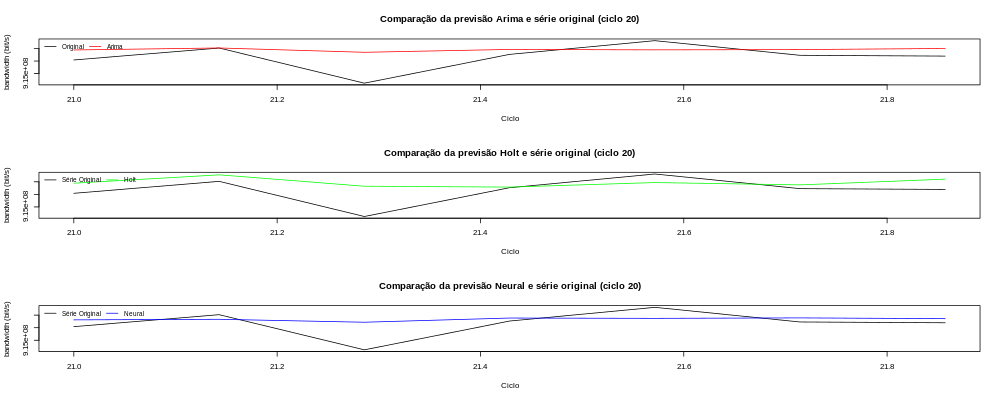

In [40]:
%%R -h 400 -w 1000 # ciclo 20

par(mfrow = c(3, 1))
plot(mytsTest4, main="Comparação da previsão Arima e série original (ciclo 20)", xlab="Ciclo", ylab="bandwidth (bit/s)")
lines(prevArima20$mean, col="red")
legend("topleft", legend = c("Original", "Arima"), col = c("black", "red"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest4, main="Comparação da previsão Holt e série original (ciclo 20)", xlab="Ciclo", ylab="bandwidth (bit/s)")
lines(prevHolt20$mean, col="green")
legend("topleft", legend = c("Série Original", "Holt"), col = c("black", "green"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest4, main="Comparação da previsão Neural e série original (ciclo 20)", xlab="Ciclo", ylab="bandwidth (bit/s)")
lines(prevNeural20$mean, col="blue")
legend("topleft", legend = c("Série Original", "Neural"), col = c("black", "blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

#dev.off()

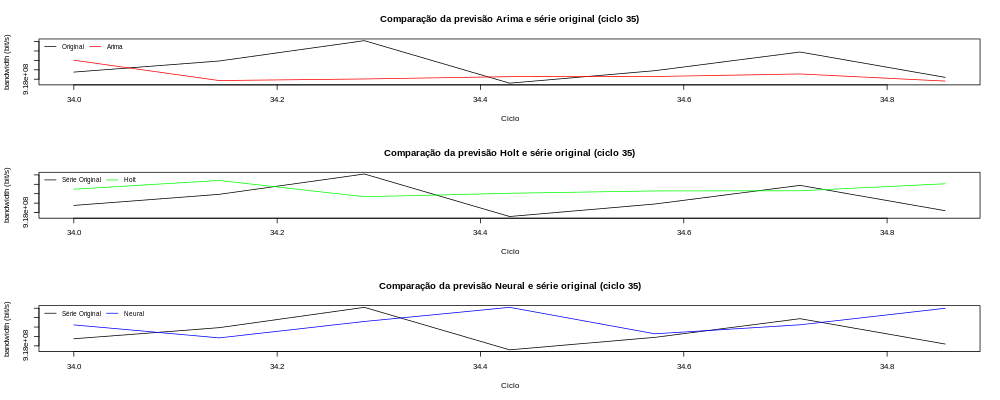

In [42]:
%%R -h 400 -w 1000 # ciclo 35

par(mfrow = c(3, 1))
plot(mytsTest7, main="Comparação da previsão Arima e série original (ciclo 35)", xlab="Ciclo", ylab="bandwidth (bit/s)")
lines(prevArima35$mean, col="red")
legend("topleft", legend = c("Original", "Arima"), col = c("black", "red"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest7, main="Comparação da previsão Holt e série original (ciclo 35)", xlab="Ciclo", ylab="bandwidth (bit/s)")
lines(prevHolt35$mean, col="green")
legend("topleft", legend = c("Série Original", "Holt"), col = c("black", "green"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest7, main="Comparação da previsão Neural e série original (ciclo 35)", xlab="Ciclo", ylab="bandwidth (bit/s)")
lines(prevNeural35$mean, col="blue")
legend("topleft", legend = c("Série Original", "Neural"), col = c("black", "blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

#dev.off()

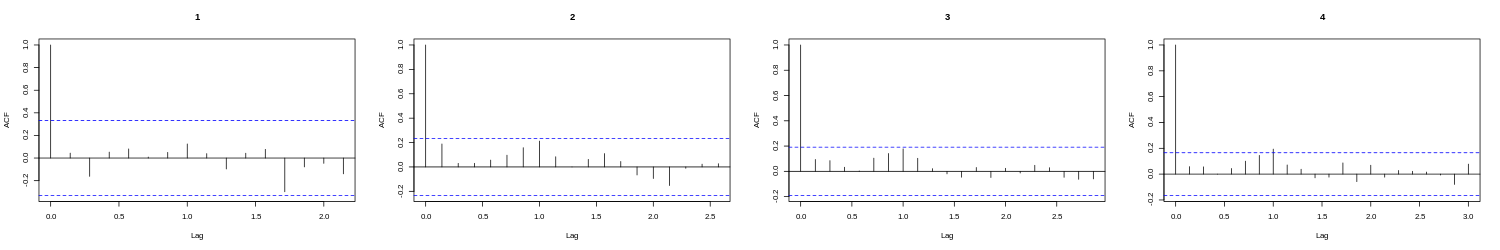

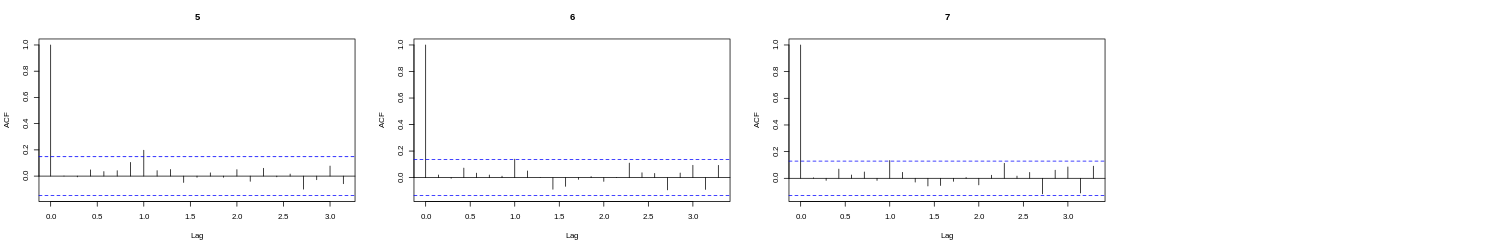

In [50]:
%%R -h 250 -w 1500 # Autocorrelação dos conjuntos de treinamento (Indica dados estacionários)

par(mfrow = c(1, 4))
acf(mytsTrain5, main = "1")
acf(mytsTrain10, main = "2")
acf(mytsTrain15, main = "3")
acf(mytsTrain20, main = "4")
acf(mytsTrain25, main = "5")
acf(mytsTrain30, main = "6")
acf(mytsTrain35, main = "7")


## Avaliação

### RMSE

In [44]:
%%R

Neural_RMSE_inOrder = c(
  rmse(mytsTest1, prevNeural5$mean),
  rmse(mytsTest2, prevNeural10$mean),
  rmse(mytsTest3, prevNeural15$mean),
  rmse(mytsTest4, prevNeural20$mean),
  rmse(mytsTest5, prevNeural25$mean),
  rmse(mytsTest6, prevNeural30$mean),
  rmse(mytsTest7, prevNeural35$mean)
)

print(Neural_RMSE_inOrder)

[1] 1891557 6636066 5303696 4737840 6594572 3971820 4844984


In [45]:
%%R

Holt_RMSE_inOrder = c(
  rmse(mytsTest1, prevHolt5$mean),
  rmse(mytsTest2, prevHolt10$mean),
  rmse(mytsTest3, prevHolt15$mean),
  rmse(mytsTest4, prevHolt20$mean),
  rmse(mytsTest5, prevHolt25$mean),
  rmse(mytsTest6, prevHolt30$mean),
  rmse(mytsTest7, prevHolt35$mean)
)

print(Holt_RMSE_inOrder)

[1] 5866249 6473467 4658477 5327013 7476279 3900156 3971456


In [46]:
%%R 

Arima_RMSE_inOrder = c(
  rmse(mytsTest1, prevArima5$mean),
  rmse(mytsTest2, prevArima10$mean),
  rmse(mytsTest3, prevArima15$mean),
  rmse(mytsTest4, prevArima20$mean),
  rmse(mytsTest5, prevArima25$mean),
  rmse(mytsTest6, prevArima30$mean),
  rmse(mytsTest7, prevArima35$mean)
)

print(Arima_RMSE_inOrder)

[1] 2075799 6259217 4882728 5322495 6909982 7849836 4068070


### MAPE

In [47]:
%%R

Arima_MAPE_inOrder = c(
  mape(mytsTest1, prevArima5$mean),
  mape(mytsTest2, prevArima10$mean),
  mape(mytsTest3, prevArima15$mean),
  mape(mytsTest4, prevArima20$mean),
  mape(mytsTest5, prevArima25$mean),
  mape(mytsTest6, prevArima30$mean),
  mape(mytsTest7, prevArima35$mean)
)

print(Arima_MAPE_inOrder)

[1] 0.002101850 0.005329056 0.004256605 0.004236533 0.005744299 0.007356925
[7] 0.003544594


In [48]:
%%R

Neural_MAPE_inOrder = c(
  mape(mytsTest1, prevNeural5$mean)*100,
  mape(mytsTest2, prevNeural10$mean)*100,
  mape(mytsTest3, prevNeural15$mean)*100,
  mape(mytsTest4, prevNeural20$mean)*100,
  mape(mytsTest5, prevNeural25$mean)*100,
  mape(mytsTest6, prevNeural30$mean)*100,
  mape(mytsTest7, prevNeural35$mean)*100
)

print(Neural_MAPE_inOrder)

[1] 0.1558277 0.5800609 0.4617032 0.3786514 0.5467310 0.3502918 0.4167629


In [49]:
%%R

Holt_MAPE_inOrder = c(
  mape(mytsTest1, prevHolt5$mean)*100,
  mape(mytsTest2, prevHolt10$mean)*100,
  mape(mytsTest3, prevHolt15$mean)*100,
  mape(mytsTest4, prevHolt20$mean)*100,
  mape(mytsTest5, prevHolt25$mean)*100,
  mape(mytsTest6, prevHolt30$mean)*100,
  mape(mytsTest7, prevHolt35$mean)*100
)

print(Holt_MAPE_inOrder)

[1] 0.6265503 0.5624241 0.4275622 0.4342106 0.6604672 0.3237665 0.4012158
